# HW-2

## Question - 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

NOISES = [0, 10e-3, 10e-4, 10e-5, 10e-6, 10e-7, 10e-8]

def plot_on_complex_plane(data, title):
    # extract real part using numpy array
    x = data.real
    # extract imaginary part using numpy array
    y = data.imag

    # plot the complex numbers
    fig, ax = plt.subplots()
    ax.plot(x, y, 'g*')
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    # ax.axis('equal')
    # grid()
    plt.xlim([0, 45])
    plt.ylim([-30, 30])
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.title(title)
    # plt.show()
    return ax

def generate_polynomial():
    i = list(range(1, 21))
    poly = np.poly1d(i, True)
    return poly

def add_noise_to_coeffs(poly1d_obj,noise):
    # poly1d_obj = poly1d_object.copy()
    number_of_coeff = poly1d_obj.c.shape[0]
    for i in range(number_of_coeff):
        poly1d_obj.c[i] = poly1d_obj.c[i] + noise 

    
def question_1():
    # l = len(NOISES)
    # fig, axs = plt.subplots(l,1)
    for idx, noise in enumerate(NOISES):
        poly =  generate_polynomial()
        add_noise_to_coeffs(poly,NOISES[idx])
        title = "Figure"+str(idx)+": "+str(NOISES[idx]) + " Noise"
        ax = plot_on_complex_plane(poly.r,title)
        plt.show()
        del poly
    # plt.show()

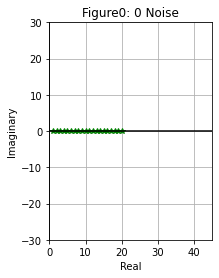

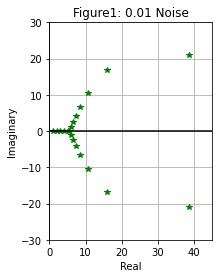

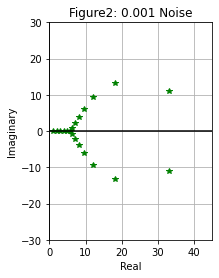

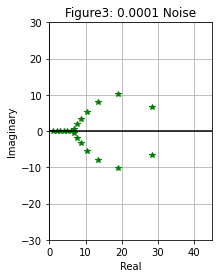

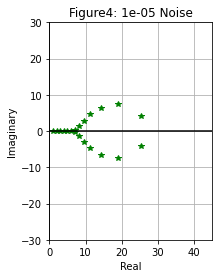

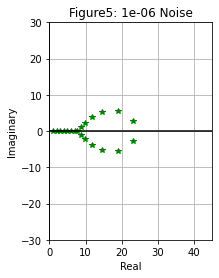

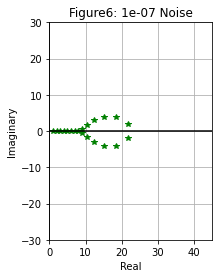

In [2]:
question_1()

## Question - 2

In [3]:
import math
import sys

print("Euler value: ",math.e)
# print("The maximum value that float can represent", sys.float_info.max)

def find_m():
    iteration = -1
    base = math.e
    temp = 10
    while temp != 1:
        iteration +=1
        exponent = 1 / pow(2,iteration)        
        temp = pow(base, exponent)
        print("e^(1/2^"+str(iteration)+"):",temp)        
    return iteration-1

def calculate_euler(x, m):
    original = math.exp(x)    
    exponent = x / pow(2,m)
    base = math.e
    res = pow(base, exponent)
    err = []
    for i in range(m):
        res = res * res
        err.append(abs(original - res))        
    return res, err

def question_2():
    m = find_m()
    print("Appropriate m is ", m)
    xs = [-1000, -1000, -100, -10, -1, 0, 1, 10, 100]
    for x in xs:
        res, err = calculate_euler(x, m)
        plt.plot(err)
        plt.title("Final error for x="+str(x)+" is "+str(err[-1]) )
        plt.ylabel('Error')
        plt.xlabel('m')
        plt.show()

Euler value:  2.718281828459045


In [4]:
# def find_m_1():
#     iteration = 0
#     temp = 1
#     while temp != 0:
#         iteration += 1 
#         temp = temp / 2
#         print("2^-"+str(iteration)+": ",temp)
#     return iteration - 1
# m = find_m_1()
# print(m)
# def find_m_2():
#     iteration = 0
#     temp = sys.float_info.max
#     while temp > 2:
#         iteration += 1 
#         temp = temp / 2
#         print(temp)
#     return iteration
# m = find_m_2()
# print(m)

e^(1/2^0): 2.718281828459045
e^(1/2^1): 1.6487212707001282
e^(1/2^2): 1.2840254166877414
e^(1/2^3): 1.1331484530668263
e^(1/2^4): 1.0644944589178593
e^(1/2^5): 1.0317434074991028
e^(1/2^6): 1.0157477085866857
e^(1/2^7): 1.007843097206448
e^(1/2^8): 1.0039138893383475
e^(1/2^9): 1.0019550335910028
e^(1/2^10): 1.0009770394924165
e^(1/2^11): 1.0004884004786945
e^(1/2^12): 1.0002441704297478
e^(1/2^13): 1.0001220777633837
e^(1/2^14): 1.0000610370189331
e^(1/2^15): 1.000030518043791
e^(1/2^16): 1.0000152589054785
e^(1/2^17): 1.000007629423635
e^(1/2^18): 1.0000038147045416
e^(1/2^19): 1.0000019073504518
e^(1/2^20): 1.0000009536747712
e^(1/2^21): 1.000000476837272
e^(1/2^22): 1.0000002384186075
e^(1/2^23): 1.0000001192092967
e^(1/2^24): 1.0000000596046466
e^(1/2^25): 1.0000000298023228
e^(1/2^26): 1.0000000149011612
e^(1/2^27): 1.0000000074505806
e^(1/2^28): 1.0000000037252903
e^(1/2^29): 1.0000000018626451
e^(1/2^30): 1.0000000009313226
e^(1/2^31): 1.0000000004656613
e^(1/2^32): 1.000000000

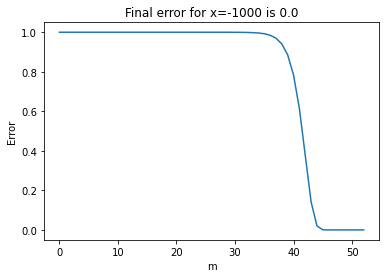

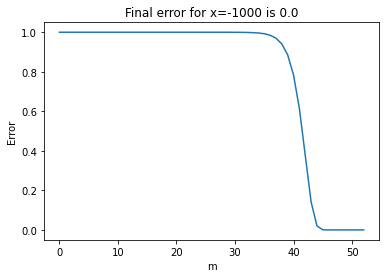

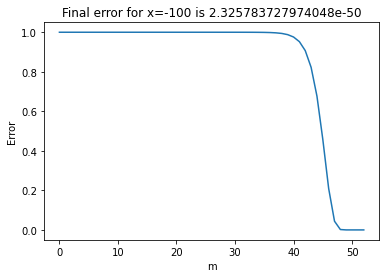

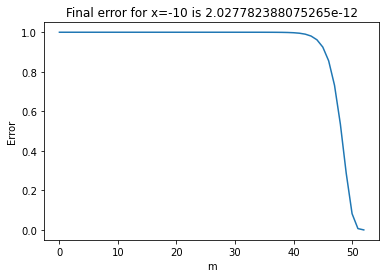

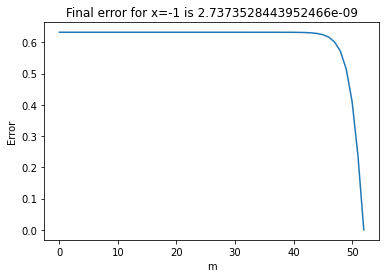

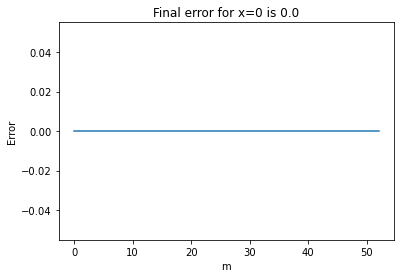

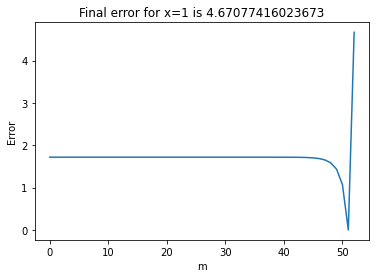

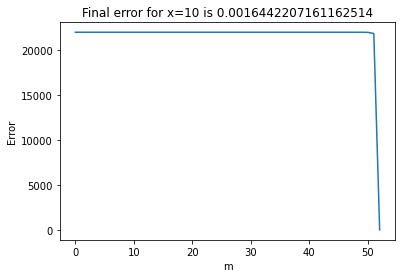

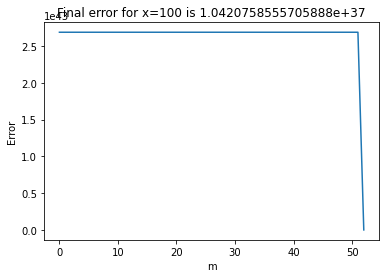

In [5]:
question_2()

## Question - 4

In [6]:
from skimage.util.shape import view_as_windows
import numpy as np
import scipy
import scipy.linalg   # SciPy Linear Algebra Library
import pandas as pd
b_vec = np.ones((20,1))

"""
for function, reference to:https://stackoverflow.com/questions/52463972/...
generating-banded-matrices-using-numpy#:~:text=def%20sliding_windows_vw...
(a%2C%20W)%3A%0A%20%20%20%20a%20%3D%20np.asarray(a)%0A%20%20%20%20p%20%3D%...
20np.zeros(W%2D1%2Cdtype%3Da.dtype)%0A%20%20%20%20b%20%3D%20np.concatenate((...
p%2Ca%2Cp))%0A%20%20%20%20return%20view_as_windows(b%2Clen(a)%2BW%2D1)%5B%3A%3A%2D1%5D
"""
def sliding_windows_vw(a, W):
    a = np.asarray(a)
    p = np.zeros(W,dtype=a.dtype)
    b = np.concatenate((p,a,p))
    return view_as_windows(b,len(a)+W-1)[::-1]

def generate_3_band_matrix(a,b,c,W):
    arr = [a,b,c]    
    return sliding_windows_vw(arr, W)

def matplot_sparse_matrix(L, title, cmap_name =plt.cm.PiYG ):
    fig, ax = plt.subplots(figsize=(10,10))
    # min_val = L.min
    # max_val = L.max
    ax.matshow(L, cmap=cmap_name)
    plt.title(title)
    values = []
    for i in range(20):
        for j in range(20):
            c = L[j,i]
            if c in values:
                pass
            else:            
                values.append(c)
                ax.text(i, j, str(c), ha= "center")
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def question_5(a,b,c,W, method_name = "LU"):
    A = generate_3_band_matrix(a,b,c,W)
    
    # Show A matrix
    matplot_sparse_matrix(A, "A matrix")
    
    # For comparison
    x_vec_comparison = np.linalg.solve(A, b_vec)
    
    if method_name == "LU":
        P, L, U = scipy.linalg.lu(A)
        matplot_sparse_matrix(P, "P matrix") #plt.cm.Greens
        matplot_sparse_matrix(L, "L matrix", cmap_name =  plt.cm.PuOr)
        matplot_sparse_matrix(U, "U matrix", cmap_name =  plt.cm.BrBG)
        """
        Now PLUx_vec = b_vec
        Assume 
        Ux_vec = y_vec
        Ly_vec = b_vec_permutated
        Pb_vec_permutated = b_vec
        So
        Step1: Solve Pb_vec_permutated = b_vec, then find b_vec_permutated
        Step2: Solve Ly_vec = b_vec_permutated, then find y_vec
        Step3: Solve Ux_vec = y_vec, then find x_vec
        x_vec by solving PUx_vec = y_vec
        """
        b_vec_permutated = np.linalg.solve(P, b_vec)
        y_vec = np.linalg.solve(L,b_vec_permutated)
        x_vec = np.linalg.solve(U,y_vec)
        
        # Compare result
        if (x_vec == x_vec_comparison).all():
            print("Success, x is \n", x_vec)
        
    elif method_name == "LDLt" and is_pos_def(A):
        l, d, perm = scipy.linalg.ldl(A)        
        A_hat = l[perm, :] @ d @ l[perm,:].T
        # check whether A_hat equals to A:
        if (A_hat == A).all():
            matplot_sparse_matrix(l[perm,:], "L matrix") 
            matplot_sparse_matrix(d, "D matrix", cmap_name =  plt.cm.PuOr)
            """
            Now LDL.tx_vec = b_vec
            Assume 
            L.tx_vec = z_vec
            Dz_vec   = y_vec
            Ly_vec   = b_vec
            So
            Step1: Solve Ly_vec = b_vec, then find y_vec
            Step2: Solve Dz_vec = y_vec, then find z_vec
            Step3: Solve L.tx_vec = z_vec, then find x_vec
            Step4: compare / check
            """
            y_vec = np.linalg.solve(l[perm, :], b_vec)
            z_vec = np.linalg.solve(d, y_vec)
            x_vec = np.linalg.solve(l[perm,:].T, z_vec)
            # Compare result
            if (x_vec == x_vec_comparison).all():
                print("Success, x is \n", x_vec)
            elif np.allclose(x_vec, x_vec_comparison):
                print("Success, x is not perfectly match numerically but they are close each other.\n")
                df_from_arr = pd.DataFrame({"x_with_LDLt":x_vec.reshape(20),"x_without_LDLt":x_vec_comparison.reshape(20), "Difference":x_vec.reshape(20) -x_vec_comparison.reshape(20)})
                display(df_from_arr)
                    
            
        
        

    




### Part a

Success, x is 
 [[-8.58156268e+03]
 [ 5.72137512e+03]
 [-9.53395853e+02]
 [-1.27119447e+03]
 [ 1.16559493e+03]
 [-3.52998464e+02]
 [-1.52866001e+02]
 [ 2.19910156e+02]
 [-9.53181033e+01]
 [-9.42464964e+00]
 [ 3.83891342e+01]
 [-2.21178729e+01]
 [ 2.28220388e+00]
 [ 6.18448839e+00]
 [-4.55039355e+00]
 [ 1.30543290e+00]
 [ 9.79842580e-01]
 [-7.55039355e-01]
 [ 5.10078710e-01]
 [ 2.44960645e-01]]


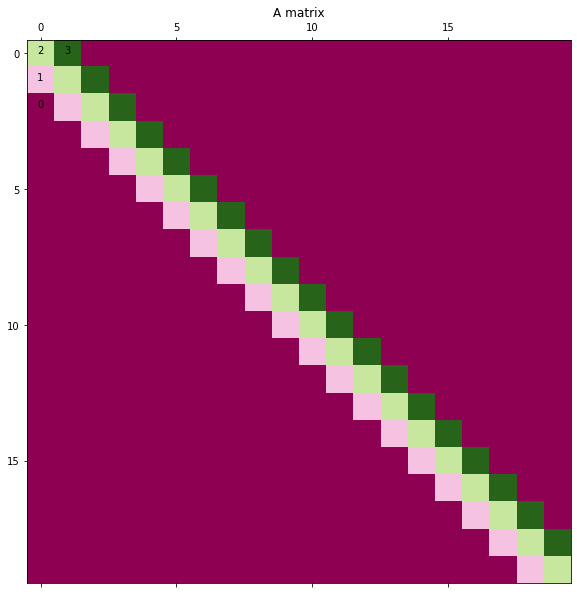

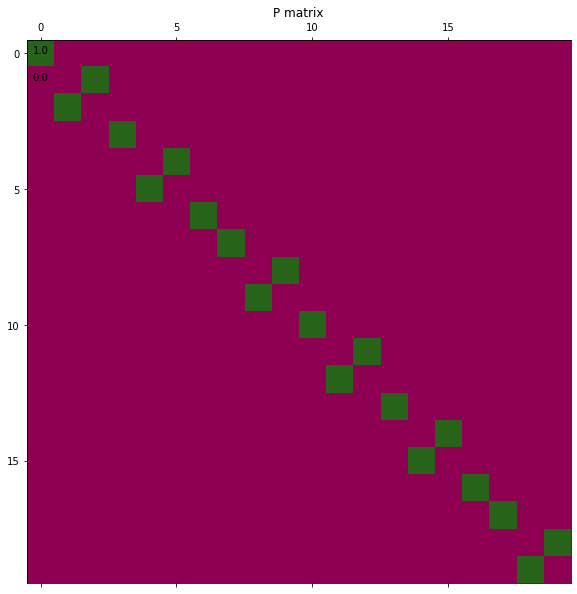

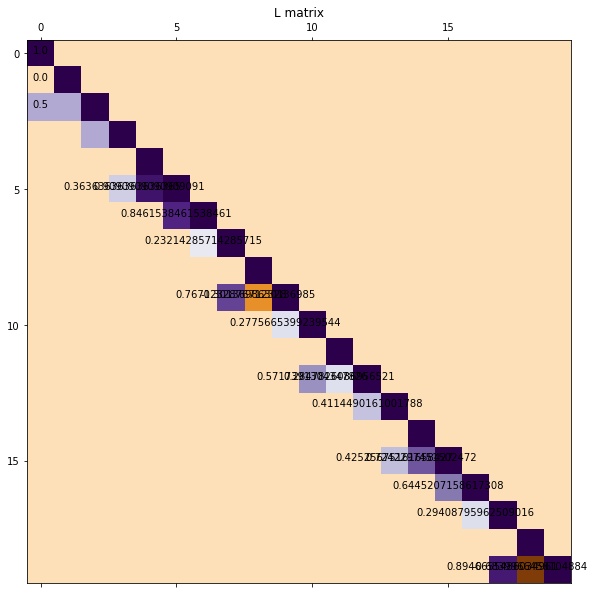

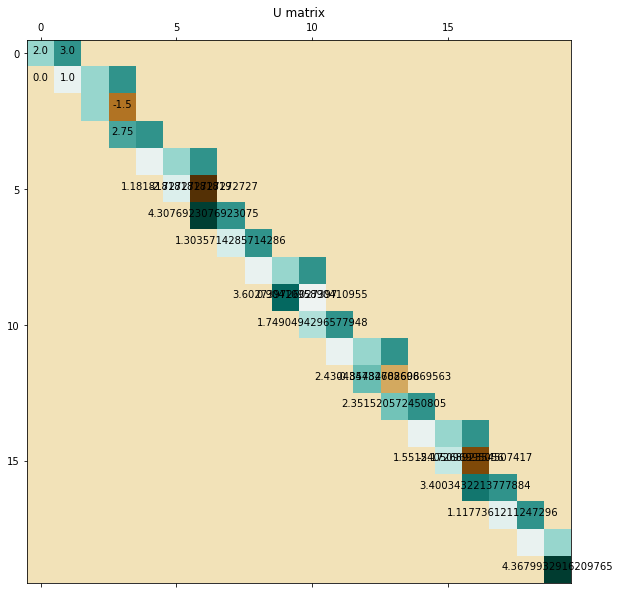

In [7]:
W = 18
a = 1
b = 2
c = 3
question_5(a,b,c,W, method_name = "LU")

### Part b

Success, x is not perfectly match numerically but they are close each other.



,x_with_LDLt,x_without_LDLt,Difference
0,10.0,10.0,-3.552714e-15
1,19.0,19.0,-7.105427e-15
2,27.0,27.0,-7.105427e-15
3,34.0,34.0,-7.105427e-15
4,40.0,40.0,-7.105427e-15
5,45.0,45.0,-7.105427e-15
6,49.0,49.0,-7.105427e-15
7,52.0,52.0,-7.105427e-15
8,54.0,54.0,-7.105427e-15
9,55.0,55.0,0.000000e+00


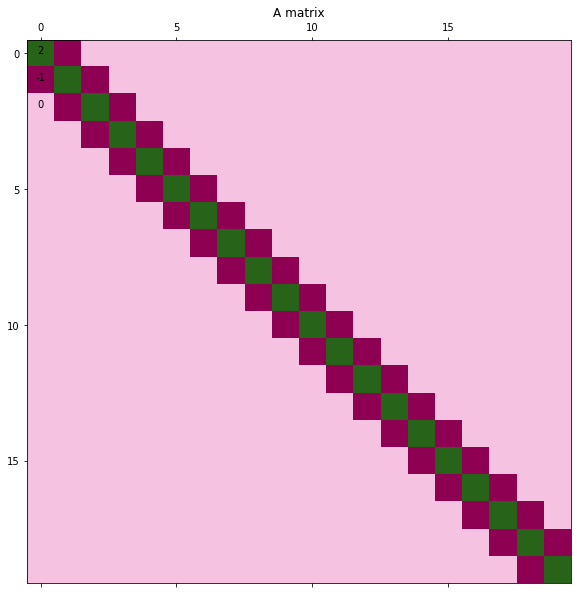

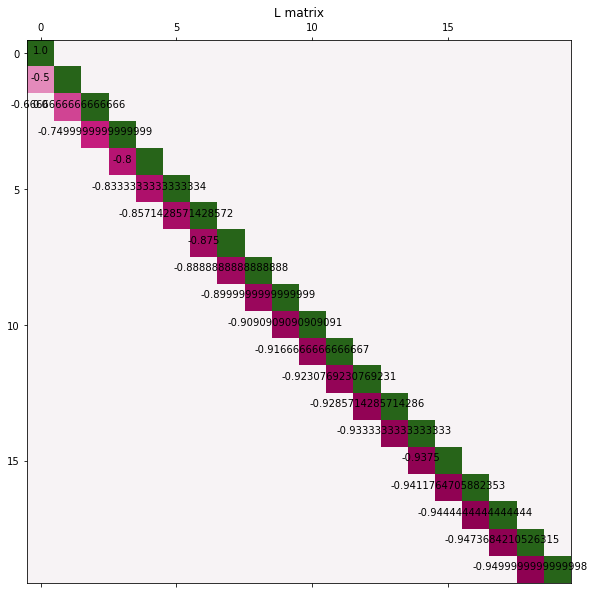

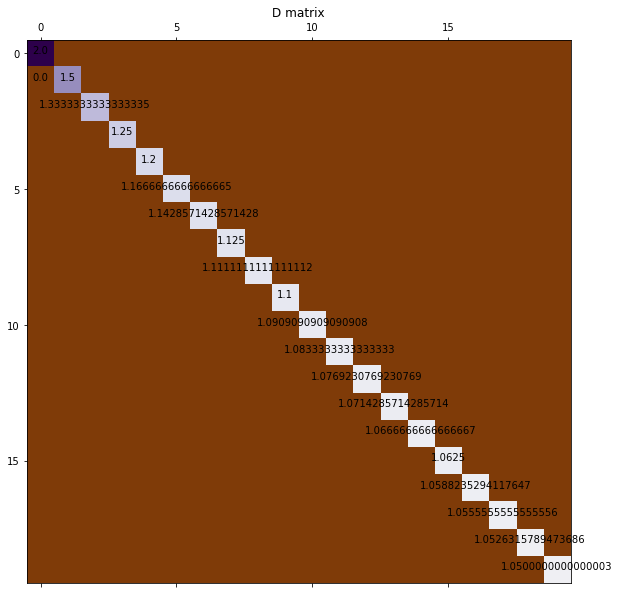

In [8]:
W = 18
a = -1
b = 2
c = -1
question_5(a,b,c,W, method_name = "LDLt")


In [9]:
a = np.array([[1.29690000,0.86480000],[0.21610000,0.14410000]])
b = np.array([[0.8648],[0.1441]])
# b = np.array([[2],[-2]])
x= scipy.linalg.solve(a,b)
x

array([[0.],
       [1.]])